# **Mini Stunting-Prevalence Predictor on 0-50 Months Children by k-Nearest Neighbor (kNN)**

## Import

### Import Libraries

In [85]:
#Data Organizer
import pandas as pd

# Plot Maker
import seaborn as sns
from pylab import rcParams as rcp
import matplotlib.pyplot as plt

#Model Decision Maker
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier

### Import Data 

In [86]:
stunt = pd.read_csv('Stunt.csv')
stunt = stunt.set_index('pidlink')

## Correlation Check

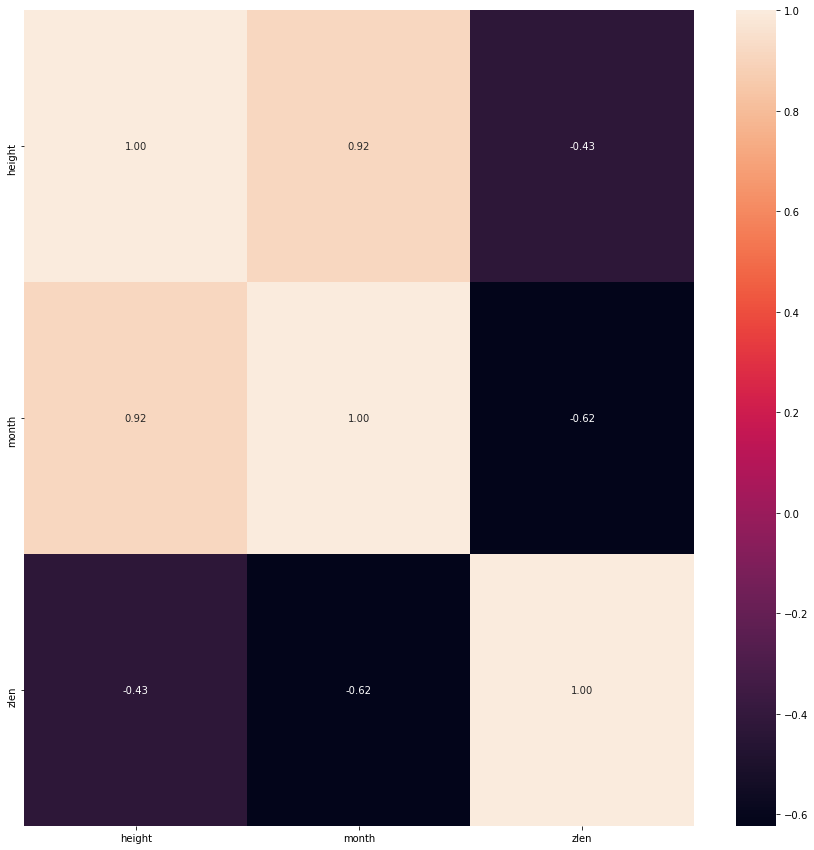

In [87]:
def corr_plot(correlation):
    
    # init figure size
    rcp['figure.figsize'] = 15, 15
    fig = plt.figure()
    sns.heatmap(correlation.corr(), annot=True, fmt=".2f")
    plt.show()
    
# Plot Function
corr_plot(stunt)

## Data Checker

### Full Data

In [88]:
stunt

,height,sex,month,zlen,result
pidlink,,,,,
1060010,89.1,M,36.0,-1.89,Normal
1060011,61.9,M,11.0,-5.43,Severely Stunting
1065104,80.6,F,35.0,-3.65,Severely Stunting
1085107,87.0,M,36.0,-2.45,Moderately Stunting
1224106,69.9,M,0.0,10.57,Normal
...,...,...,...,...,...
321260045,98.4,F,48.0,-1.01,Normal
321265203,99.9,M,48.0,-0.82,Normal
321265204,68.7,F,0.0,10.50,Normal


 ###  Stunt Result Legend

In [89]:
le = preprocessing.LabelEncoder()

stunt['sex_e']=le.fit_transform(stunt['sex'])

stunt['result_e']=le.fit_transform(stunt['result'])

pd.crosstab(
    index= [stunt['result_e'],stunt['result']],
    columns='total'
)

,col_0,total
result_e,result,
0,Moderately Stunting,473
1,Normal,5553
2,Severely Stunting,179


##  Variable Prediction Process

### Set Predictor Dataframe

In [90]:
var = stunt[['result_e','height','sex_e','zlen']]
var

,result_e,height,sex_e,zlen
pidlink,,,,
1060010,1,89.1,1,-1.89
1060011,2,61.9,1,-5.43
1065104,2,80.6,0,-3.65
1085107,0,87.0,1,-2.45
1224106,1,69.9,1,10.57
...,...,...,...,...
321260045,1,98.4,0,-1.01
321265203,1,99.9,1,-0.82
321265204,1,68.7,0,10.50


In [91]:
var_x = stunt[['result_e']]
var_y = stunt[['height','sex_e','month','zlen']]

### Predict Result Using kNN

In [92]:
x_train, x_test, y_train, y_test = tts(var_x,var_y, test_size = 0.3)

In [93]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(y_train,x_train.values.ravel())

pred = knn.predict(y_test)

### Accuracy Checker

In [94]:
print(" Metrics Accuracy:",metrics.accuracy_score(x_test, pred))

 Metrics Accuracy: 0.9946294307196563
